In [18]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

In [15]:
#loading the dataset

df = pd.read_pickle('Group_1_data_cleaned.pkl')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [19]:
columns = ['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login']

for i in columns:
    df[i] = LabelEncoder().fit_transform(df[i])
    
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,2,45,4,105,146,0,0,0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [20]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,2,45,4,105,146,0,0,0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [21]:
# defining target variable

X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [22]:
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Good alpha value using LassoCV: 0.570629
Good score value using LassoCV: 0.585487
Feature selected by Lasso is 5 variables and dropped 36 variables


Text(0.5, 1.0, 'Feature importance with Lasso Model')

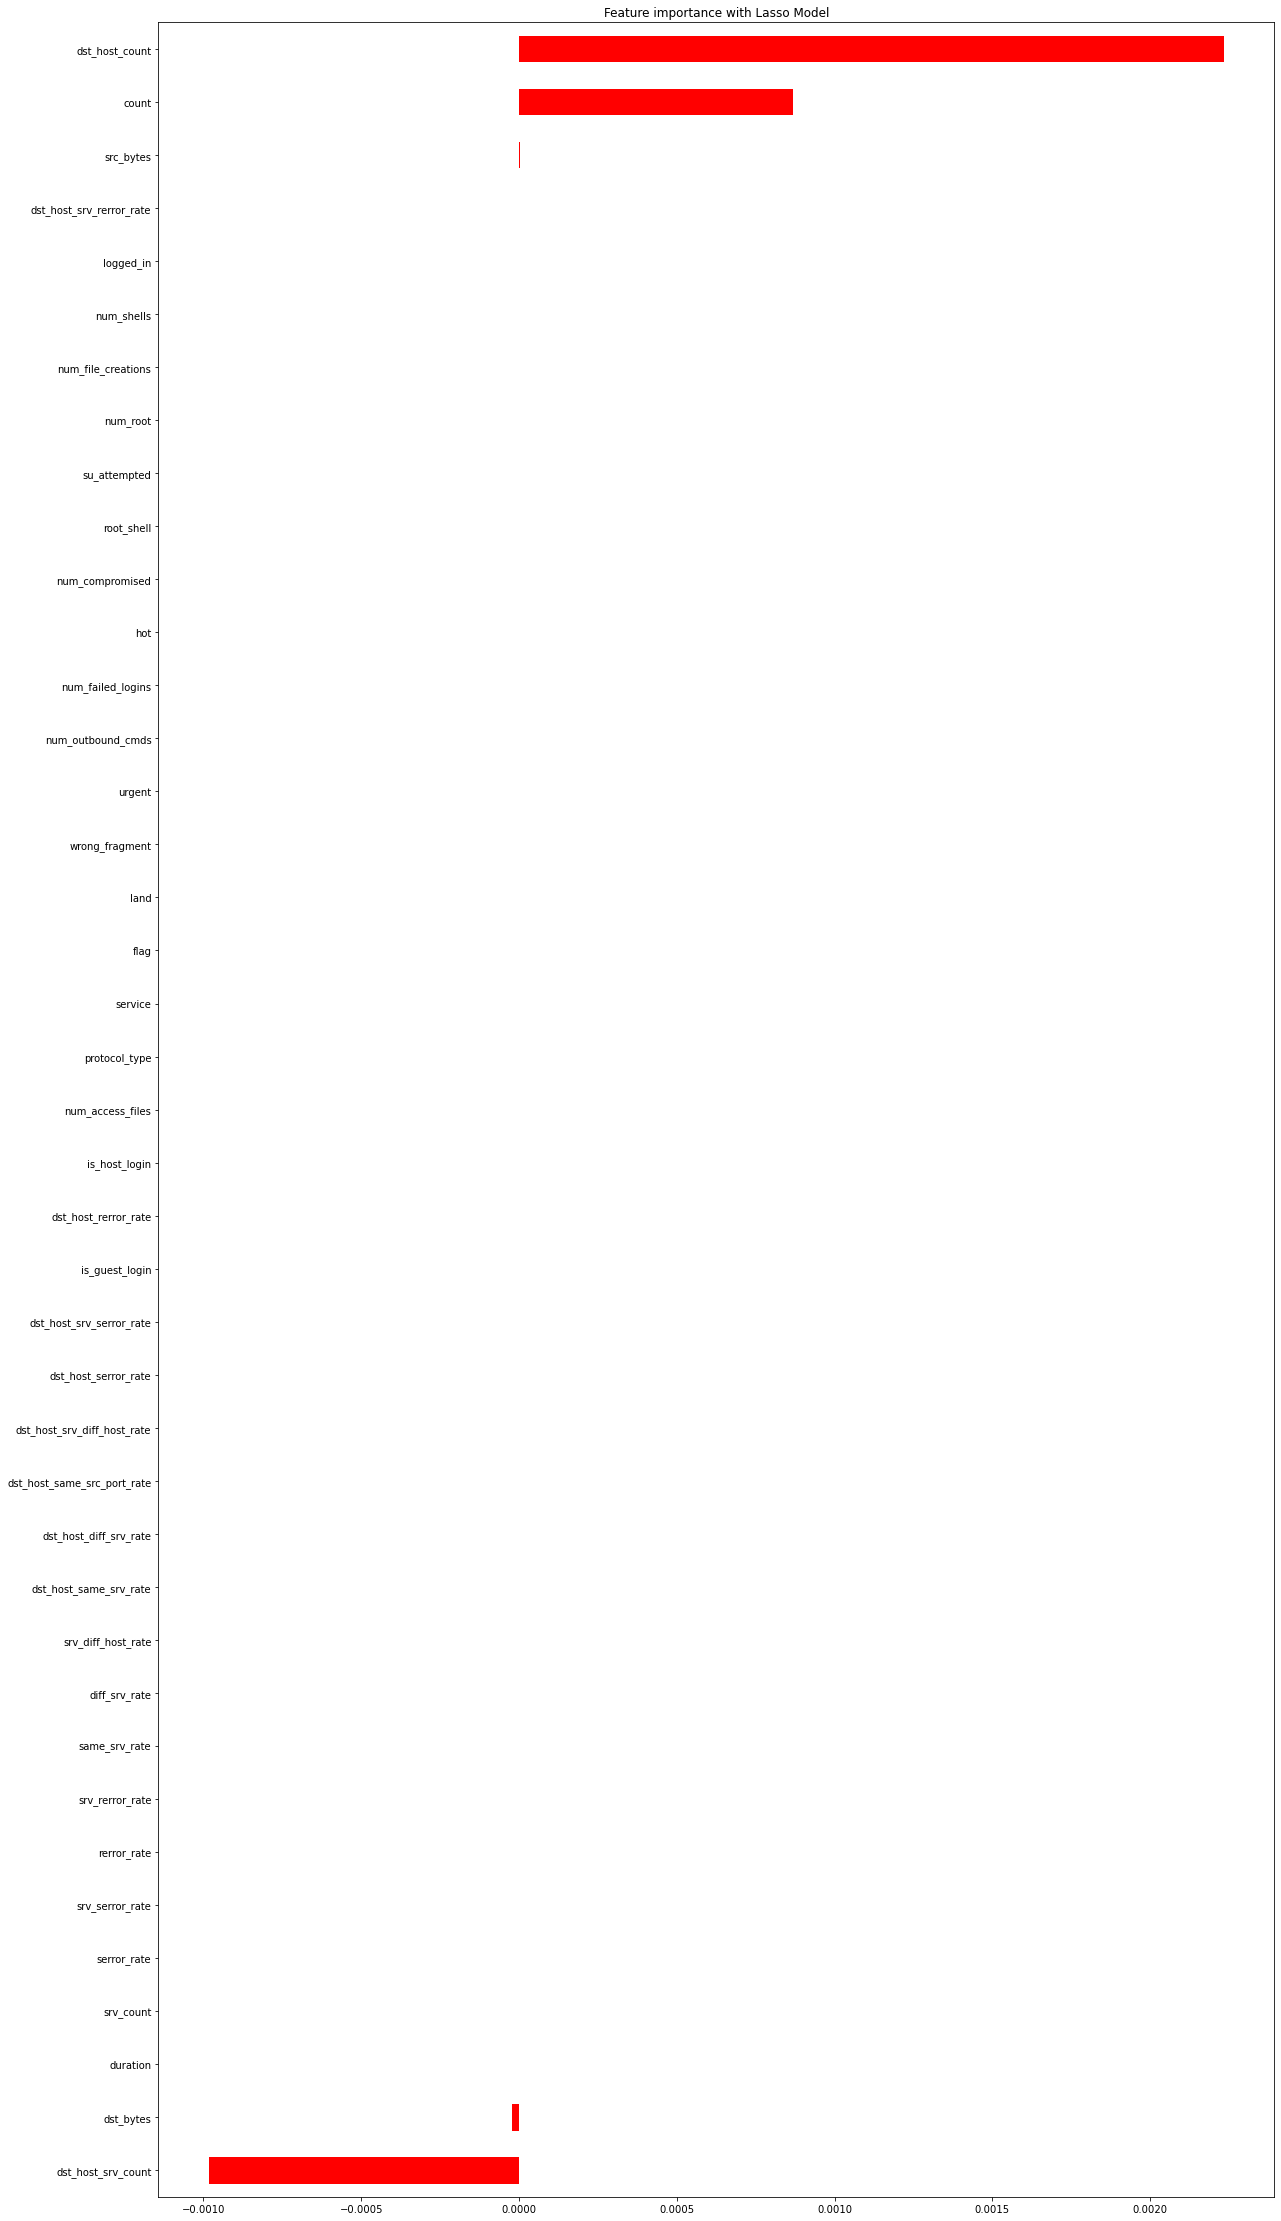

In [23]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.feature_selection import RFE
import matplotlib

# Feature selection using LassoCv
reg = LassoCV()

reg.fit(X, y)

print("Good alpha value using LassoCV: %f" % reg.alpha_)
print("Good score value using LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = X.columns)

print("Feature selected by Lasso is " + str(sum(coef != 0)) + " variables and dropped " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (20, 40)

imp_coef.plot(kind = "barh", color="red")

plt.title("Feature importance with Lasso Model")

In [24]:
X = df[['dst_host_count','count','src_bytes','dst_host_srv_count']]
y= df[['label']]

In [25]:
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#implementing random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = forest.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [30]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.9719


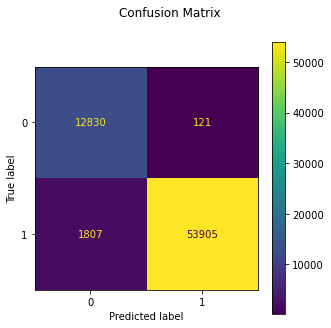

In [33]:
plt.rcParams["figure.figsize"] = [5, 5]

fig = plot_confusion_matrix(forest, X_test, y_test, display_labels=forest.classes_)
fig.figure_.suptitle("Confusion Matrix")

plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     12951
           1       1.00      0.97      0.98     55712

    accuracy                           0.97     68663
   macro avg       0.94      0.98      0.96     68663
weighted avg       0.97      0.97      0.97     68663



In [36]:
rfc = RandomForestClassifier()
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

k_fold = RepeatedStratifiedKFold(n_splits=3,
                                 n_repeats=1, 
                                 random_state=8)


random_grid = {"n_estimators": range(10, 201, 20),
               "max_features": ["sqrt", "log2"],
               "max_depth": range(10, 101, 20)
              }

rfc_rs = GridSearchCV(rfc, 
                            param_grid = random_grid,
                            cv = k_fold, 
                            n_jobs = 10, 
                            scoring = "accuracy")

rfc_rs.fit(X_train, y_train)

#best parameters from gridsearchCV
print(rfc_rs.best_params_)

print(rfc_rs.best_score_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}
0.9714108184588038


In [40]:
forest = RandomForestClassifier(max_depth = 10, max_features = 'log2', n_estimators= 150)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=150)

In [41]:
#prediction
y_pred = forest.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [42]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9721


In [43]:
#classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93     12951
           1       1.00      0.97      0.98     55712

    accuracy                           0.97     68663
   macro avg       0.94      0.98      0.96     68663
weighted avg       0.98      0.97      0.97     68663

